In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [91]:
bias = 100
X, y, coef = make_regression(100, n_features=1, bias=bias, coef=True, noise=10)

In [92]:
expected_theta = np.hstack([[bias], coef])

In [93]:
expected_theta

array([100.        ,  39.79947641])

In [94]:
X.shape

(100, 1)

In [95]:
X_update = np.hstack([np.ones((X.shape[0], 1)), X])

In [96]:
X_update.shape

(100, 2)

In [97]:
yh = np.dot(X_update, expected_theta.reshape(-1, 1))

In [98]:
y[0]

92.11007123387283

In [99]:
X_update[0]

array([ 1.        , -0.10017065])

In [100]:
expected_theta

array([100.        ,  39.79947641])

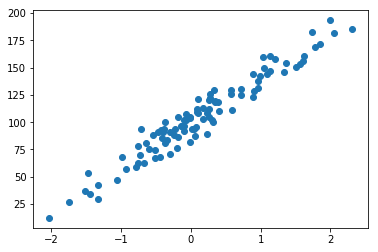

In [101]:
plt.scatter(X, y)

In [102]:
class LinearRegression:
    
    def __init__(self, lr, iters):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.y = y.reshape(-1, 1)
        
        self.theta = np.zeros([self.X.shape[1], 1])
        
        for i in range(self.iters):
            self.gradient_dec()
            
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta -= d_theta * self.lr
        
    def gradient(self):
        yh = self.hypothesis(self.X, self.theta)
        d_theta = np.mean((yh - self.y)*self.X, axis=0).reshape(-1, 1)
        return d_theta
        
    def hypothesis(self, X, theta):
        return np.dot(X, theta)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypothesis(X, self.theta).flatten()
        
        

In [156]:
model = LinearRegression(lr=.01, iters=1000)

In [157]:
model.fit(X, y)

In [160]:
yh = model.predict(X)

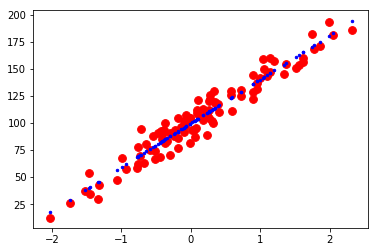

In [161]:
plt.scatter(X, y, color="red", s=60)
plt.scatter(X, yh, color="blue", s=6)